In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
X = np.arange(10)
y = (X-5)**2

print(X,y)

[0 1 2 3 4 5 6 7 8 9] [25 16  9  4  1  0  1  4  9 16]


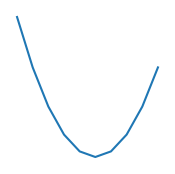

In [3]:
#given a function F we wish to find value of x that miniimizez f
plt.figure(figsize=(2,2))
plt.plot(X,y)
plt.axis("off")
plt.show()

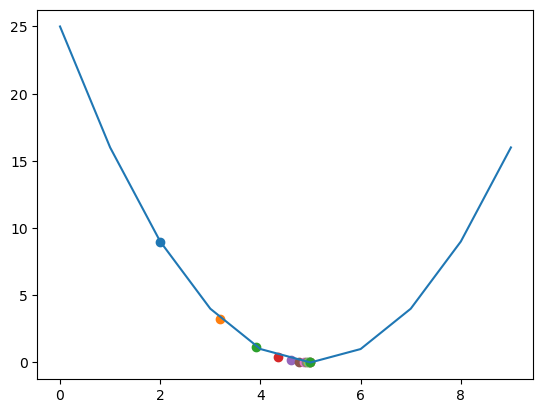

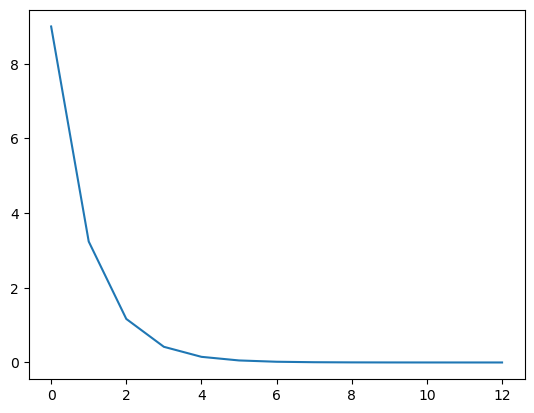

In [4]:
x = 0
lr = 0.2
steps = 50
error= []
value_of_x = []
plt.plot(X,y)
e = np.Inf
for i in range(50):
    grad = 2 * (x - 5)
    x = x - lr * grad
    ep = e
    e = ( x - 5 )** 2
    error.append(e)
    value_of_x.append(x)
    plt.scatter(x,e)
    if np.abs(ep-e)<0.0001:
        break
    
plt.show()
plt.plot(error)
plt.show()

#example challenge

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

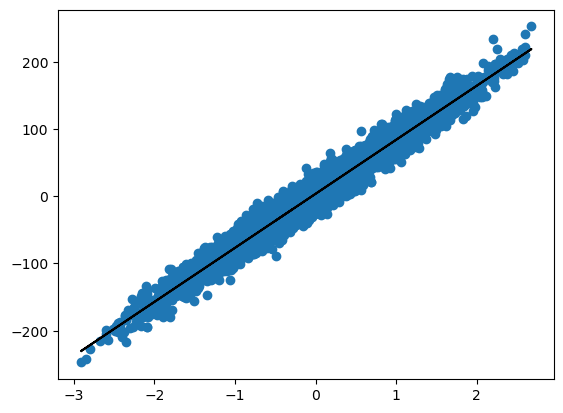

In [6]:
class linearRegression():
    def __init__(self,learning_rate=2,epochs=100):
        self.n = learning_rate
        self.epochs = epochs
        self.theta_record =  []
        self.scaler = StandardScaler()

    def numpy_to_pandas(self):
        self.X,self.y = (self.X.values,self.y.values)
    
    def normalize(self):
        self.scaler.fit_transform(self.X)
    
    def add_zeroth_column(self,X):
        return np.concatenate((np.ones((X.shape[0],1)),X), axis=1)

    def remove_outliers(self,X,y):
        lof = LocalOutlierFactor()
        outliers = lof.fit_predict(X)
        X = X[outliers == 1]
        y = y[outliers == 1]
        return X,y

    def preprocessing(self):
        self.numpy_to_pandas()
        self.X = self.add_zeroth_column(self.X)
        self.normalize()
        self.X,self.y = self.remove_outliers(self.X,self.y)
        
    
    def visualize_data(self):
        plt.scatter(self.X[:,1:],self.y)

    def visualize_prediction(self):
        plt.plot(self.X[:,1:],self.linear_prediction(self.X),color="black")
        # plt.show()
        # plt.plot(self.losses)
        # plt.show()
    
    def linear_prediction(self,X):
        return np.dot(X,self.theta)
    
    def gradient(self):
        self.grad[0] = (1/self.m)* np.sum((self.linear_prediction(self.X) - self.y))
        self.grad[1] = (1/self.m)* np.sum((self.linear_prediction(self.X) - self.y)* self.X)

    def update(self):
        self.gradient()
        self.theta[0] = self.theta[0] - self.n * self.grad[0]
        self.theta[1] = self.theta[1] - self.n * self.grad[1]
        self.theta_record.append(self.theta)
         
    def loss(self):
        return ((1/2*self.m) *  np.sum((self.linear_prediction(self.X) - self.y)**2))
    
    def break_condition(self):
        if len(self.losses)>1 and np.abs(self.losses[-1] - self.losses[-2]) < 0.01:
            return True

    def gradient_descent(self):
        self.theta = np.zeros((2,1))
        self.grad = np.zeros(2)
        self.losses = []
        self.m = self.X.shape[0]
        self.visualize_data()
        for i in range(self.epochs):
            self.update()
            l = self.loss()
            self.losses.append(l)
            # if self.break_condition():
            #     break
        self.visualize_prediction()
        plt.show()
   
    def fit(self,X,y):
        self.X = X
        self.y = y
        self.preprocessing()
        self.gradient_descent()
        
X_train = pd.read_csv("../Data/Linear_X_Train.csv",index_col=None)
y_train = pd.read_csv("../Data/Linear_Y_Train.csv",index_col=None)
X_test = pd.read_csv("../Data/Linear_X_Test.csv",index_col=None)
        
lr = linearRegression(0.3,10000)
lr.fit(X_train,y_train)
# lr.visualize()
y_test = lr.linear_prediction(lr.scaler.transform(lr.add_zeroth_column(X_test)))

In [7]:
df = pd.DataFrame(y_test,columns=["y"])
df.to_csv("../Data/y_prediction.csv",index=False)

In [8]:
lr.theta

array([[ 3.70817072],
       [80.45353338]])

In [12]:
a = np.array([1,2,3]) #defines column for b
b = np.array([4,5,6,7]) # defines rows for a 
a,b = np.meshgrid(a,b)
print(a.shape)
print(b.shape)
#now that we have a 2d grid we need to define a function that we want to plot of this grid like z = x+y

fig  = plt.figure()

axes = fig.add_subplot(111,projection="3d")
axes.plot_surface(a,b,((a+b)**10),cmap="coolwarm")
plt.show()
#red means region of high value and darker blue indicate to low region

(4, 3)
(4, 3)


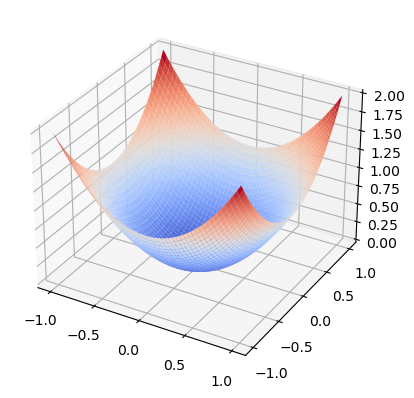

In [43]:
a = np.arange(-1,1,0.0002)
b = a
a,b = np.meshgrid(a,b)
fig  = plt.figure()
axes = fig.add_subplot(111,projection="3d")
axes.plot_surface(a,b,a**2+b**2,cmap="coolwarm")
plt.show()
#red means region of high value and darker blue indicate to low region